# Exact Solution Methods to Sequential Problems using HexWorld Problem from ADM

In [67]:
from typing import Tuple, List
from hex_world import HexWorld, HexMove, Hexagon


GRID = [
    [ "0","0","0", "0","0","0","0", "0","0","0",],
    ["5","0","0", "X","0","0","X","X","0","0",],
    ["0","0","-10", "0","X", "0","0","0", "X","10"],
]

EAST_POLICY = [[HexMove.EAST for _ in range(10)] for _ in range(3)]


hw = HexWorld(grid=GRID, policy=EAST_POLICY)

gamma = 1

def lookahead(state: Hexagon, depth=0):
    if depth>10:
        return 0
    action = state.policy
    R = state.score
    if R == -1:
        raise Exception('shouldnt be able to move to hole')
    if R != 0:
        return R
    
    lottery = state.reachable_states(action)

    rollout = 0
    for prob, next_state in lottery:
        if next_state == None:
            rollout += -1 * prob
            rollout += prob * lookahead(state, depth+1)
        else:
            rollout += (prob * lookahead(next_state, depth+1))
    
    return gamma * rollout

        
U_oo_lookahead = []
for i in range(3):
    for j in range(10):
        hexagon = hw.hexagons[i][j]
        if hexagon.score != -1:
            U_oo_lookahead.append(lookahead(hexagon))
U_oo_lookahead = np.array(U_oo_lookahead)

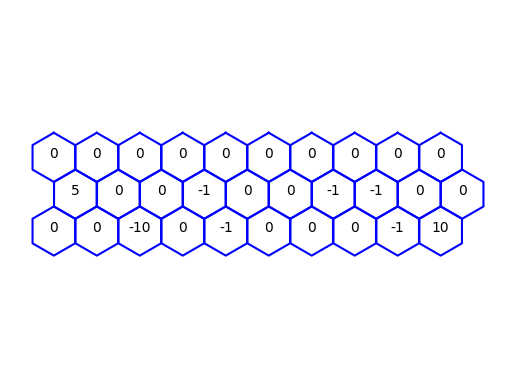

In [3]:
hw.plt_graph()

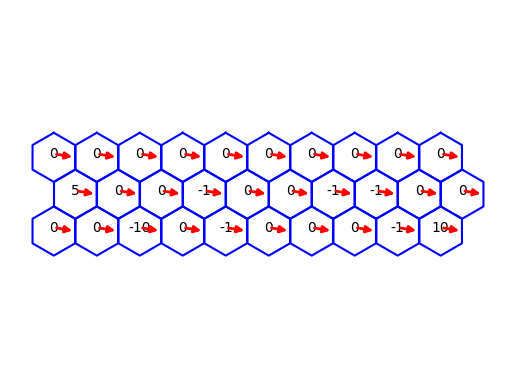

In [4]:
hw.plt_graph(show_score=True, show_policy=True)

In [36]:
import numpy as np
T, R = hw.get_mdp()

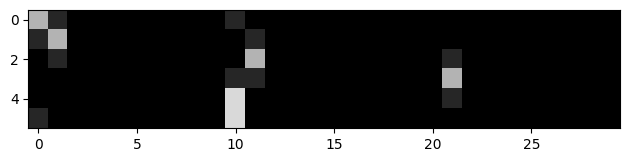

In [37]:
from skimage import io 
io.imshow(T[10])

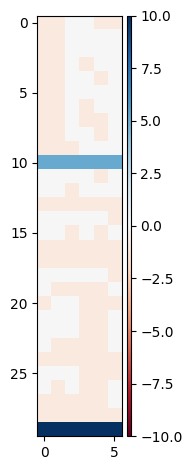

In [38]:
io.imshow(R)

# Reimplement lookahead with transition matrix 

In [78]:
from hex_world import HexMove

policy = HexMove.EAST.value

def lookahead(s: int, depth=0):
    if depth>10:
        return 0 
    reward = R[s, policy]
    if reward != 0:
        return reward
    for next_state_index, next_state_prob in enumerate(T[s, policy]):
        if next_state_prob > 0:
            if next_state_index == s:
                reward += next_state_prob * -1
            reward += next_state_prob * lookahead(next_state_index, depth+1)
    return gamma * reward
        
        
    
U_lookahead = np.array([lookahead(i) for i in range(30)])
    
    
    

# Alternatively solved by solving system of equations 

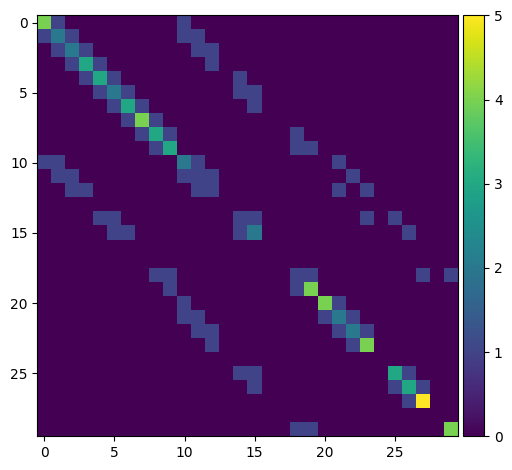

In [90]:
T_policy = np.sum(T, axis=1) 
io.imshow(T_policy)

In [91]:
R[:,policy].shape

(30,)

In [92]:
np.linalg.inv(np.eye(T_policy.shape[0]) - gamma * T_policy).shape
    

(30, 30)

In [93]:
U_linear_eq = np.linalg.inv(np.eye(T_policy.shape[0]) - gamma * T_policy) @ R[:,policy][...,np.newaxis]
U_linear_eq

array([[ 1.71299687],
       [-1.33211255],
       [ 3.27798124],
       [-0.41697186],
       [-0.76712818],
       [ 1.71165699],
       [-0.34149174],
       [-0.18606521],
       [ 0.89968736],
       [ 0.84251898],
       [-3.80687807],
       [ 0.14801251],
       [-1.67690933],
       [-1.        ],
       [ 0.23957124],
       [-0.84260831],
       [-1.        ],
       [-1.        ],
       [-2.45582849],
       [ 0.87110317],
       [ 1.84296561],
       [-1.72201876],
       [ 3.53791871],
       [-0.28700313],
       [-1.        ],
       [ 0.18508263],
       [ 0.23287182],
       [ 0.19178205],
       [-1.        ],
       [-2.80509156]])

In [94]:
U_lookahead

array([-0.8737335 , -2.07454889, -2.16222268, -2.25636028, -1.854946  ,
       -1.78649075, -1.74205681, -1.31384826, -0.88529412, -1.        ,
        5.        , -1.18870634, -1.        , -1.        , -1.19697403,
       -1.        , -1.        , -1.        ,  0.65      , -1.        ,
       -0.40115658, -1.3505244 , -1.17647058, -1.        , -1.        ,
       -1.52938069, -1.42856476, -1.        , -1.        , 10.        ])

In [95]:
U_oo_lookahead

array([ -2.19401312,  -4.18439566,  -4.35996567,  -4.57079703,
        -5.33428704,  -6.09249962,  -6.83302297,  -7.73415433,
        -8.64893088, -10.16734324,   5.        ,  -6.73721484,
        -7.45496877,  -6.7131314 ,  -7.72286588,  -6.87953116,
       -11.        ,  -7.00552292,  -9.47834844, -10.        ,
       -11.        ,  -8.62312085, -10.00000177, -11.        ,
        10.        ])